# Experiment One Data Analysis
### By Xavier Moskala exm413@case.edu

In [1]:
# Importing modules needed for data analysis.
from scipy.odr import ODR, Model, Data, RealData
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin
from scipy import signal as ss
from scipy import constants as cs
from pylab import *
import glob

In [2]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:
        if N <= 9:
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+"00"+str(N)+'.SPE'
        elif N <= 99:
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+"0"+str(N)+'.SPE'  
        else: 
            file = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample
## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+'000.SPE'
    path = path.replace(" ", "%20")
    return path
def url2(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+'.SPE'
    path = path.replace(" ", "%20")
    return path
def url3(path):
    path = 'https://gitlab.com/xmoskala/srlab/-/raw/main/Compton'+path+'.Spe'
    path = path.replace(" ", "%20")
    return path
def unit(data):
    return data/max(data)

In [3]:
# Read spectrum files (.spe) as .csv with pandas

## Cs137 Readings

deg0 = pd.read_csv(url("/2-2-23/deg/0deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg10 = pd.read_csv(url("/2-2-23/deg/10deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg20 = pd.read_csv(url("/2-2-23/deg/20deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg30 = pd.read_csv(url("/2-2-23/deg/30deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg40 = pd.read_csv(url("/2-2-23/deg/40deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg50 = pd.read_csv(url("/2-2-23/deg/50deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg60 = pd.read_csv(url("/2-2-23/deg/60deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg70 = pd.read_csv(url("/2-2-23/deg/70deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg80 = pd.read_csv(url("/2-2-23/deg/80deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg90 = pd.read_csv(url("/2-2-23/deg/90deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 


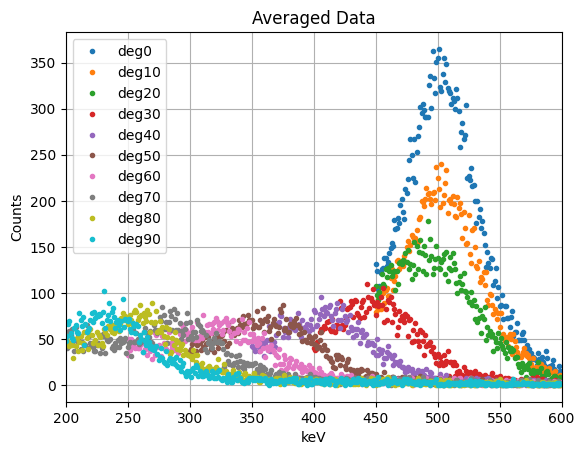

In [4]:
x = np.arange(0,2048,1)[0:2047]

fig, ax = plt.subplots()

ax.plot(x[450:600], deg0[450:600], label="deg0", ls='', marker='.')
ax.plot(x[450:600], deg10[450:600], label="deg10", ls='', marker='.')
ax.plot(x[450:600], deg20[450:600], label="deg20", ls='', marker='.')
ax.plot(x[400:600], deg30[400:600], label="deg30", ls='', marker='.')
ax.plot(x[350:600], deg40[350:600], label="deg40", ls='', marker='.')
ax.plot(x[300:600], deg50[300:600], label="deg50", ls='', marker='.')
ax.plot(x[250:600], deg60[250:600], label="deg60", ls='', marker='.')
ax.plot(x[200:600], deg70[200:600], label="deg70", ls='', marker='.')
ax.plot(x[200:600], deg80[200:600], label="deg80", ls='', marker='.')
ax.plot(x[200:600], deg90[200:600], label="deg90", ls='', marker='.')


plt.xlim(200,600)
#plt.ylim(0,1.1)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()


In [5]:
#TODO: Find Channel v Energy curve/relationship
nrg = np.array([88,122,511,661.2,835,1173,1274,1332]) 
channel = np.array([97,130,502,674,806,1095,1217,1230])

def lin(x, m, b):
    return m*x + b
p1, C1 = curve_fit(lin, channel, nrg, absolute_sigma=True)
sigp1 = np.sqrt(np.diag(C1))
m1 = p1[0]
b1 = p1[1]
err1 = sigp1[0]

def qdrat(x, a, b, c):
    return a*x**2 + b*x + c
p2, C2 = curve_fit(qdrat, channel, nrg, p0=np.array([1.0,1.0,1.0]), absolute_sigma=True)
sigp2 = np.sqrt(np.diag(C2))
a2 = p2[0]
b2 = p2[1]
c2 = p2[2]
err2 = sigp2[0]


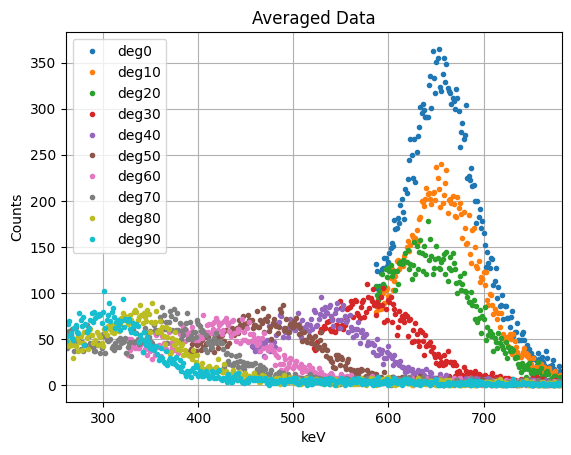

In [6]:
Na= 392
#quick cal
cal = 511/Na

x = np.arange(0,2048,1)[0:2047]

fig, ax = plt.subplots()

ax.plot(cal*x[450:600], deg0[450:600], label="deg0", ls='', marker='.')

ax.plot(cal*x[450:600], deg10[450:600], label="deg10", ls='', marker='.')
ax.plot(cal*x[450:600], deg20[450:600], label="deg20", ls='', marker='.')
ax.plot(cal*x[400:600], deg30[400:600], label="deg30", ls='', marker='.')
ax.plot(cal*x[350:600], deg40[350:600], label="deg40", ls='', marker='.')
ax.plot(cal*x[300:600], deg50[300:600], label="deg50", ls='', marker='.')
ax.plot(cal*x[250:600], deg60[250:600], label="deg60", ls='', marker='.')
ax.plot(cal*x[200:600], deg70[200:600], label="deg70", ls='', marker='.')
ax.plot(cal*x[200:600], deg80[200:600], label="deg80", ls='', marker='.')
ax.plot(cal*x[200:600], deg90[200:600], label="deg90", ls='', marker='.')


plt.xlim(cal*200,cal*600)
#plt.ylim(0,1.1)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()


In [7]:
#TODO Make a theoretical model, Plot Energy vs Angle

In [322]:
# Read spectrum files (.spe) as .csv with pandas

## Cs137 Readings

deg0 = pd.read_csv(url2("/2-7-23/30min/0deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg10 = pd.read_csv(url2("/2-7-23/30min/10deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg20 = pd.read_csv(url2("/2-7-23/30min/20deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg30 = pd.read_csv(url2("/2-7-23/30min/30deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg40 = pd.read_csv(url3("/2-7-23/30min/40deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg50 = pd.read_csv(url2("/2-7-23/30min/50deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg60 = pd.read_csv(url2("/2-9-23/30min/60deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg70 = pd.read_csv(url2("/2-9-23/30min/70deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg80 = pd.read_csv(url2("/2-9-23/30min/80deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg90 = pd.read_csv(url2("/2-9-23/30min/90deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 


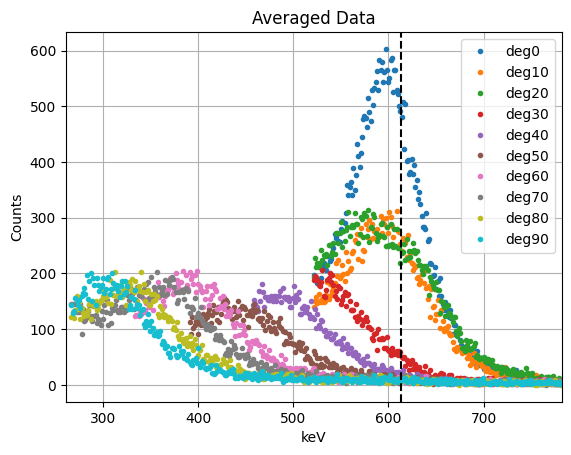

In [323]:
Na1= 392
Na2= 383
#quick cal
cal1 = 511/Na1
cal2 = 511/Na2

x = np.arange(0,2048,1)[0:2047]

fig, ax = plt.subplots()

ax.plot(cal1*x[400:600], deg0[400:600], label="deg0", ls='', marker='.')
ax.plot(cal1*x[400:600], deg10[400:600], label="deg10", ls='', marker='.')
ax.plot(cal1*x[400:600], deg20[400:600], label="deg20", ls='', marker='.')
ax.plot(cal1*x[400:600], deg30[400:600], label="deg30", ls='', marker='.')
ax.plot(cal1*x[350:600], deg40[350:600], label="deg40", ls='', marker='.')
ax.plot(cal1*x[300:600], deg50[300:600], label="deg50", ls='', marker='.')
ax.plot(cal2*x[250:600], deg60[250:600], label="deg60", ls='', marker='.')
ax.plot(cal2*x[200:600], deg70[200:600], label="deg70", ls='', marker='.')
ax.plot(cal2*x[200:600], deg80[200:600], label="deg80", ls='', marker='.')
ax.plot(cal2*x[200:600], deg90[200:600], label="deg90", ls='', marker='.')

ax.axvline(613, ls='--', color='black')


plt.xlim(cal*200,cal*600)
#plt.ylim(0,1.1)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()


In [324]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(theta,E,m):
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

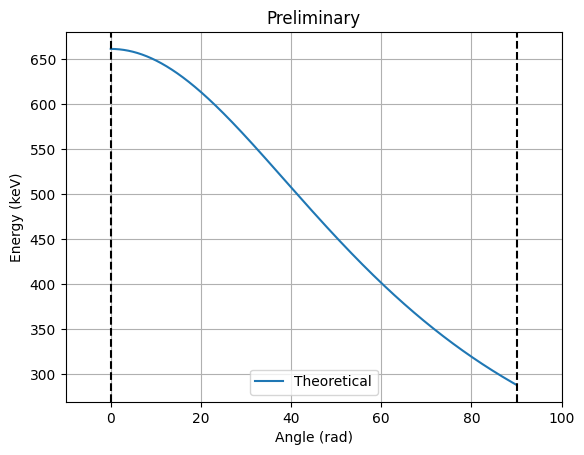

In [325]:
x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy(x,661.2,511), label="Theoretical")
ax.axvline(0, ls='--', color='black')
ax.axvline(90, ls='--', color='black')

plt.xlim(-10,100)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (rad)', ylabel='Energy (keV)',
       title='Preliminary')
ax.grid()
ax.legend()

In [326]:
data = np.array([np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
                 ,np.array([3,4])])
print(data[0])

#p, C = curve_fit(energy, x, np.log(arry), absolute_sigma=True)
#sigp = np.sqrt(np.diag(C))
#m = p[0]
#b = p[1]
#err = sigp[0]

[ 0 10 20 30 40 50 60 70 80 90]


/tmp/ipykernel_873833/246332028.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


(array([ 95, 213, 325, 443]), {})


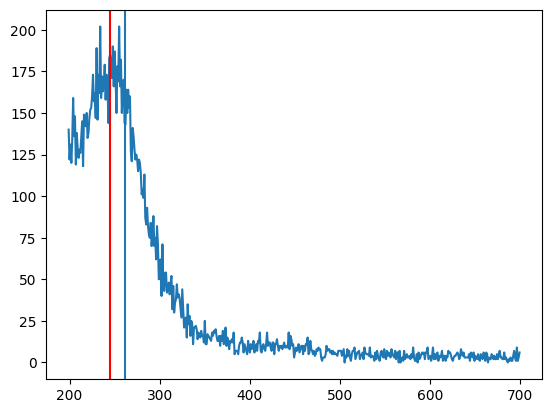

In [327]:
x = np.arange(0,2048,1)[0:2047]

fig, ax = plt.subplots()

ind = 199

ax.plot(x[ind:700],deg80[ind:700])
ax.axvline(int(ss.find_peaks_cwt(deg80[ind:700],x[ind:700]))+ind)
d = 100
ind = 160
print(ss.find_peaks(deg80[ind:700],distance=d))
ax.axvline(150 + ss.find_peaks(deg80[ind:700],distance=d)[0][0], color="red")

In [328]:
def pk_find(deg, width, plot):
    x = np.arange(0,2048,1)[0:2047]
    peak = int(ss.find_peaks_cwt(deg[width[0]:width[1]],x[width[0]:width[1]]))+width[0]
    if plot>0:
        fig, ax = plt.subplots()

        ax.plot(x[width[0]:width[1]],deg[width[0]:width[1]])
        ax.axvline(peak)
    else: return peak

In [329]:
#pk_find(deg0, [375,700], 1)
#pk_find(deg10, [350,700], 1)
#pk_find(deg20, [340,700], 1)
#pk_find(deg30, [310,700], 1)
#pk_find(deg40, [280,700], 1)
#pk_find(deg50, [240,700], 1)
#pk_find(deg60, [210,700], 1)
#pk_find(deg70, [190,700], 1)
##pk_find(deg80, [200,300], 1)
##pk_find(deg90, [190,300], 1)

In [330]:
def alt_pk_find(deg, width, dist, choice, plot):
    x = np.arange(0,2048,1)[0:2047]
    peak = ss.find_peaks(deg[width[0]:width[1]], distance=dist)[0][choice]+width[0]
    if plot>0:
        fig, ax = plt.subplots()

        ax.plot(x[width[0]:width[1]],deg[width[0]:width[1]])
        ax.axvline(peak)
    else: return peak

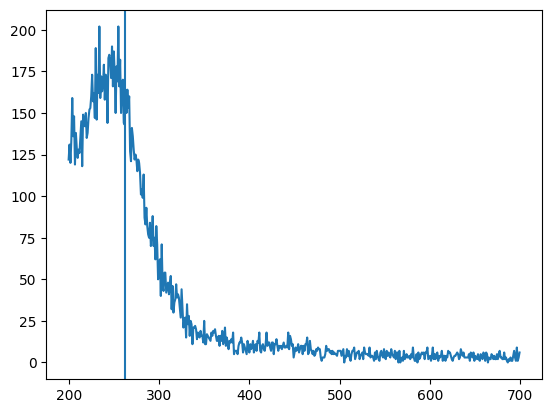

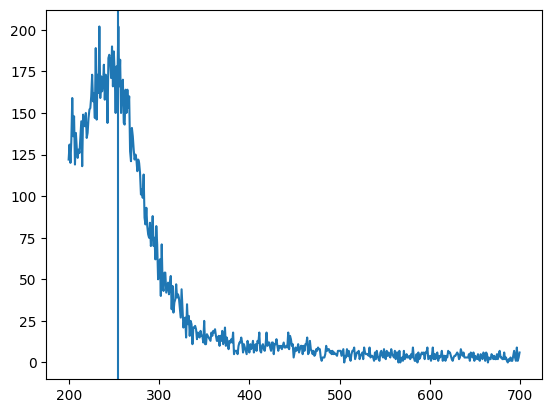

In [331]:
pk_find(deg80, [200,700], 1)
alt_pk_find(deg80, [200,700], 100, 0, 1)

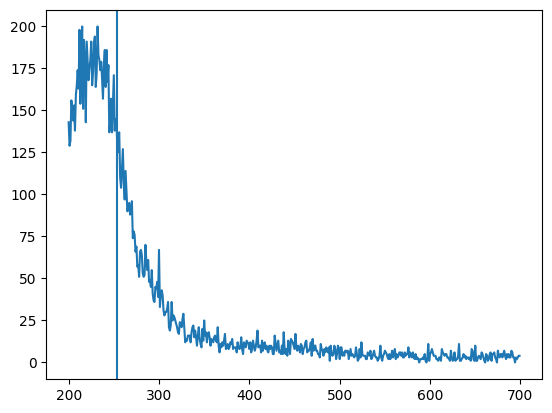

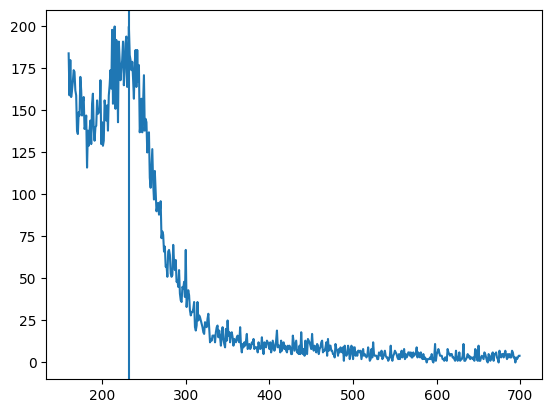

In [332]:
pk_find(deg90, [200,700], 1)
alt_pk_find(deg90, [160,700], 50, 1, 1)

In [333]:
num = np.array([
        pk_find(deg0, [375,700], 0),
        pk_find(deg10, [350,700], 0),
        pk_find(deg20, [340,700], 0),
        pk_find(deg30, [310,700], 0),
        pk_find(deg40, [280,700], 0),
        pk_find(deg50, [240,700], 0),
        pk_find(deg60, [210,700], 0),
        pk_find(deg70, [190,700], 0),
        alt_pk_find(deg80, [200,700], 100, 0, 0),
        alt_pk_find(deg90, [160,700], 50, 1, 0)
       ])
angles = np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

#p, C = curve_fit(energy, x, np.log(arry), absolute_sigma=True)
#sigp = np.sqrt(np.diag(C))
#m = p[0]
#b = p[1]
#err = sigp[0]

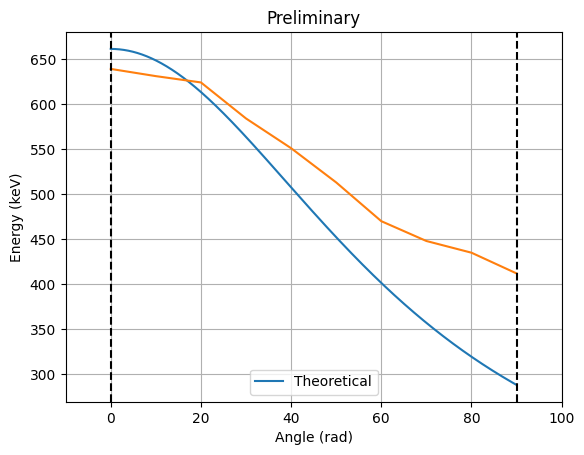

In [334]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))


x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy([661.2,511],x), label="Theoretical")
ax.plot(angles, num+180)
ax.axvline(0, ls='--', color='black')
ax.axvline(90, ls='--', color='black')

plt.xlim(-10,100)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (rad)', ylabel='Energy (keV)',
       title='Preliminary')
ax.grid()
ax.legend()

[601.24099099 572.28114685]
[599.40920129 582.63235081]


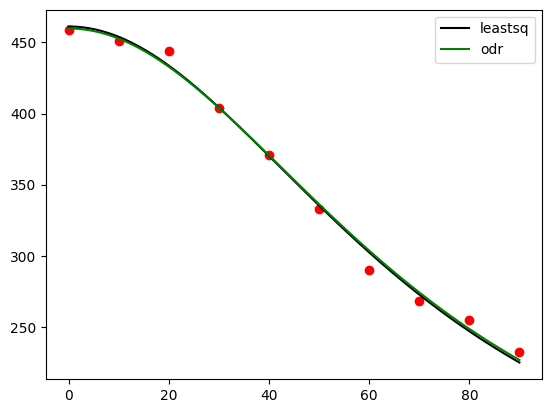

In [335]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

data = RealData(angles, num)
model = Model(energy)

odr = ODR(data,model, beta0=[0., 1.])
odr.set_job(fit_type=2)
output = odr.run()

print(output.beta*cal)

x = np.arange(0,90,0.001)
y = energy(output.beta,x)

plot(angles,num,'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = energy(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)

print(output.beta*cal)

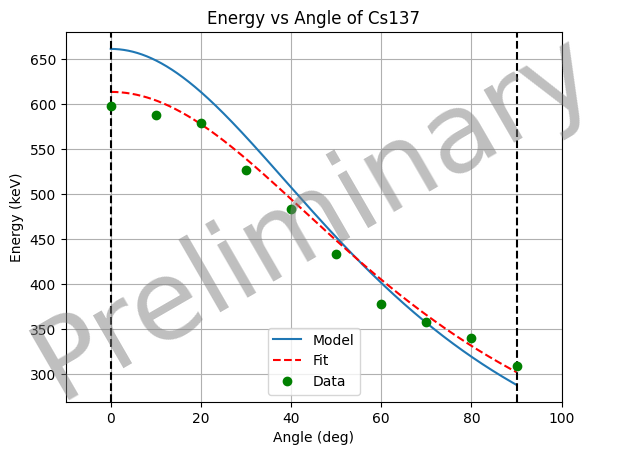

In [336]:
# If want x-error
#a = 0.1 #inch
#d = 8.5 #inch
#angle = np.arcsin(a/np.sqrt(a**2+d**2))*180/np.pi

Na1= 392
Na2= 383
#quick cal
cal1 = 511/Na1
cal2 = 511/Na2

calnum = np.concatenate([cal1*num[:7],cal2*num[7:]])

x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy([661.2,511],x), label="Model")
ax.plot(x, cal2*energy(output.beta,x), ls='--', color='r', label="Fit")
ax.errorbar(angles, calnum,
            #xerr=angle,
            #yerr=np.sqrt(counts),
            fmt='o',
            capsize=2,
            color='g',
            label="Data")
#ax.plot(angles, cal*num, marker='.', ls='', color='g')
ax.axvline(0, ls='--', color='black')
ax.axvline(90, ls='--', color='black')

plt.xlim(-10,100)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (deg)', ylabel='Energy (keV)',
       title='Energy vs Angle of Cs137')


ax.grid()
ax.legend(loc='lower center')

ax.text(0.5, 0.5, 'Preliminary', transform=ax.transAxes,
        fontsize=80, color='gray', alpha=0.5,
        ha='center', va='center', rotation=30)
#plt.savefig('30minDATA.png', dpi=1000)

plt.show()

In [139]:
# Read spectrum files (.spe) as .csv with pandas

## Cs137 10min Readings

deg0 = pd.read_csv(url("/2-2-23/deg/0deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg10 = pd.read_csv(url("/2-2-23/deg/10deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg20 = pd.read_csv(url("/2-2-23/deg/20deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg30 = pd.read_csv(url("/2-2-23/deg/30deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg40 = pd.read_csv(url("/2-2-23/deg/40deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg50 = pd.read_csv(url("/2-2-23/deg/50deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg60 = pd.read_csv(url("/2-2-23/deg/60deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int)
deg70 = pd.read_csv(url("/2-2-23/deg/70deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg80 = pd.read_csv(url("/2-2-23/deg/80deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 
deg90 = pd.read_csv(url("/2-2-23/deg/90deg"), skiprows=skip, header=0, names=["Data"]).to_numpy().T[0][1:].astype(int) 


In [24]:
#pk_find(deg0, [400,700], 1)
#pk_find(deg10, [400,700], 1)
#pk_find(deg20, [380,600], 1)
#pk_find(deg30, [340,700], 1)
#pk_find(deg40, [320,700], 1)
#pk_find(deg50, [280,700], 1)
#pk_find(deg60, [240,700], 1)
#pk_find(deg70, [200,700], 1)
#pk_find(deg80, [190,400], 1)
#pk_find(deg90, [160,400], 1)

In [119]:
num = np.array([
        pk_find(deg0, [400,700], 0),
        pk_find(deg10, [400,700], 0),
        pk_find(deg20, [380,600], 0),
        pk_find(deg30, [340,700], 0),
        pk_find(deg40, [320,700], 0),
        pk_find(deg50, [280,700], 0),
        pk_find(deg60, [240,700], 0),
        pk_find(deg70, [200,700], 0),
        pk_find(deg80, [190,400], 0),
        pk_find(deg90, [160,400], 0)
       ])
angles = np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

counts = np.array([
    deg0[pk_find(deg0, [400,700], 0)],
    deg10[pk_find(deg10, [400,700], 0)],
    deg20[pk_find(deg20, [380,600], 0)],
    deg30[pk_find(deg30, [340,700], 0)],
    deg40[pk_find(deg40, [320,700], 0)],
    deg50[pk_find(deg50, [280,700], 0)],
    deg60[pk_find(deg60, [240,700], 0)],
    deg70[pk_find(deg70, [210,700], 0)],
    deg80[pk_find(deg80, [190,400], 0)],
    deg90[pk_find(deg90, [165,400], 0)]
])

In [26]:

#Theory
## Electron mass: 511, Cs peak 661.2

def energy(theta,E,m):
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

p, C = curve_fit(energy, angles, num, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
E = p[0]
m = p[1]
err = sigp[0]
print("E =",E)
print("m =",cal*m)
print("Error =",err)

E = 513.1729889515743
m = 571.0042046947956
Error = 0.5823603479401773


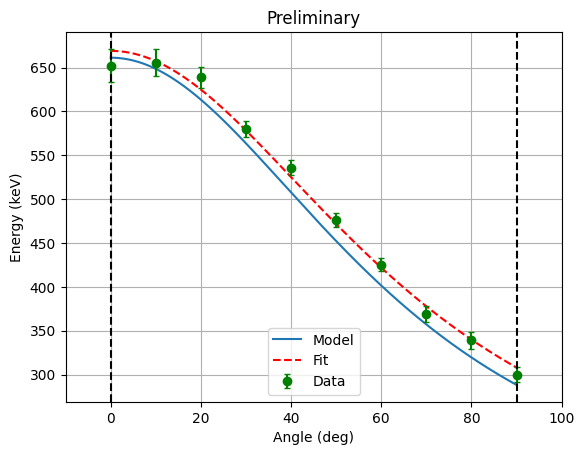

In [27]:
# If want x-error
#a = 0.1 #inch
#d = 8.5 #inch
#angle = np.arcsin(a/np.sqrt(a**2+d**2))*180/np.pi

Na= 392
#quick cal
cal = 511/Na

x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy(x,661.2,511), label="Model")
ax.plot(x, cal*energy(x, E, m), ls='--', color='r', label="Fit")
ax.errorbar(angles, cal*num,
            #xerr=angle,
            yerr=np.sqrt(counts),
            fmt='o',
            capsize=2,
            color='g',
            label="Data")
#ax.plot(angles, cal*num, marker='.', ls='', color='g')
ax.axvline(0, ls='--', color='black')
ax.axvline(90, ls='--', color='black')

plt.xlim(-10,100)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (deg)', ylabel='Energy (keV)',
       title='Preliminary')
ax.grid()
ax.legend()

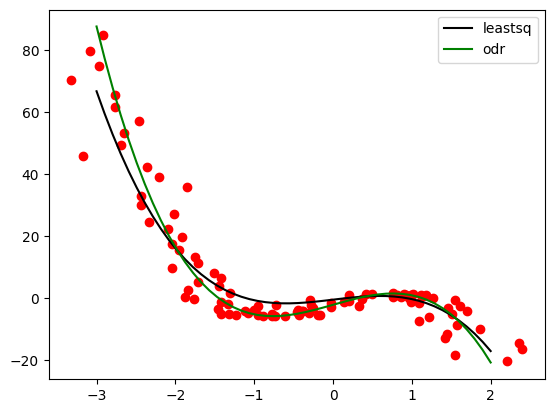

In [28]:
def func(beta, x):
    y = beta[0]+beta[1]*x+beta[2]*x**3
    return y

#generate data
x = np.linspace(-3,2,100)
y = func([-2.3,7.0,-4.0], x)

# add some noise
x += np.random.normal(scale=0.3, size=100)
y += np.random.normal(scale=0.1, size=100)

data = RealData(x, y, 0.3, 0.1)
model = Model(func)

odr = ODR(data, model, [1,0,0])
odr.set_job(fit_type=2)
output = odr.run()

xn = np.linspace(-3,2,50)
yn = func(output.beta, xn)
plot(x,y,'ro')
plot(xn,yn,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
yn = func(output.beta, xn)
plot(xn,yn,'g-',label='odr')
legend(loc=0)

[513.17298246 438.03067178]
[ 4.42388862 13.5808705 ]
[505.20479608 442.77690467]
[ 2.87400454 17.51331687]


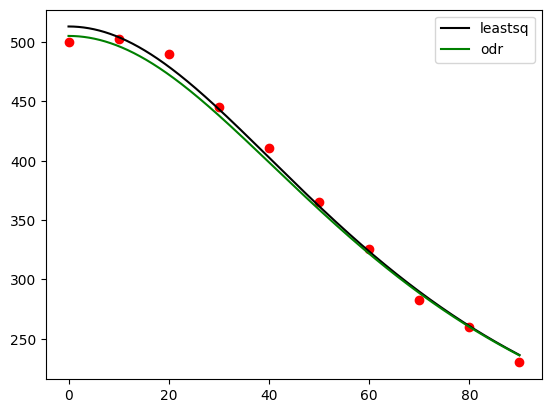

In [29]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

data = RealData(angles, num)
model = Model(energy)

odr = ODR(data,model, beta0=[0., 1.])
odr.set_job(fit_type=2)
output = odr.run()

print(output.beta)
print(output.sd_beta)

x = np.arange(0,90,0.001)
y = energy(output.beta,x)

plot(angles,num,'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = energy(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)
print(output.beta)
print(output.sd_beta)

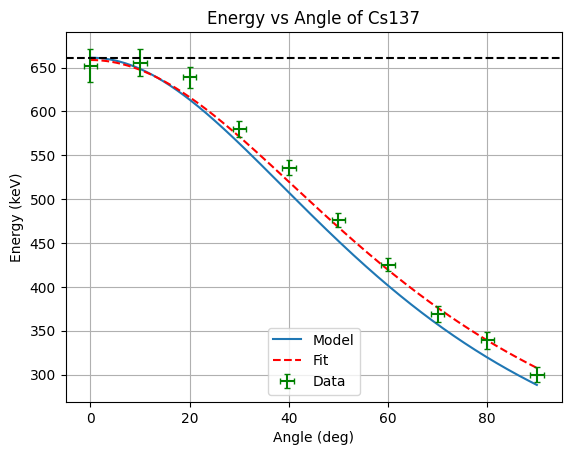

In [54]:
# If want x-error
a = 0.2 #inch
d = 8.5 #inch
angle = np.arcsin(a/np.sqrt(a**2+d**2))*180/np.pi

Na= 392
#quick cal
cal = 511/Na

x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy([661.2,511],x), label="Model")
ax.plot(x, cal*energy(output.beta,x), ls='--', color='r', label="Fit")
ax.errorbar(angles, cal*num,
            xerr=angle,
            yerr=np.sqrt(counts),
            fmt=' ',
            capsize=2,
            color='g',
            label="Data")
#ax.plot(angles, cal*num, marker='.', ls='', color='g')
#ax.axvline(0, ls='--', color='black')
#ax.axvline(90, ls='--', color='black')

ax.axhline(661.2,ls='--',color='black')

plt.xlim(-5,95)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (deg)', ylabel='Energy (keV)',
       title='Energy vs Angle of Cs137')
ax.grid()
ax.legend(loc='lower center')

#plt.savefig('10minDATA.png', dpi=1000)
plt.show()

In [55]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = sign(half_max - array(Y[0:-1])) - sign(half_max - array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)


In [56]:
FWHM(x,deg0)

array([0.148, 0.008, 0.006, 0.007, 0.001, 0.001, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.057, 0.001])

In [57]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

print(cal*energy(output.beta,x))

[658.57053775 658.57053764 658.57053729 ... 307.60927242 307.60641119
 307.60355002]


In [98]:

h = cs.physical_constants['Planck constant'][0] #J*s
c = cs.physical_constants['speed of light in vacuum'][0] #m*Hz

In [115]:
def mev2kg(value):
    return (10**6*cs.e*(value))/cs.c**2

In [118]:
h/(mev2kg(0.513)*c)

2.41684597335673e-12

In [168]:
num = cal* np.array([
        pk_find(deg0, [410,700], 0),
        pk_find(deg10, [400,600], 0),
        pk_find(deg20, [370,600], 0),
        pk_find(deg30, [330,700], 0),
        pk_find(deg40, [310,600], 0),
        pk_find(deg50, [260,600], 0),
        pk_find(deg60, [220,500], 0),
        pk_find(deg70, [200,500], 0),
        pk_find(deg80, [180,400], 0),
        pk_find(deg90, [160,400], 0)
       ])

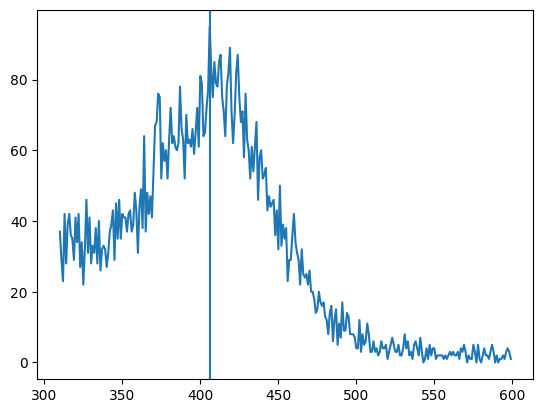

In [208]:
pk_find(deg40, [310,600], 1)

In [204]:
#error of pk_find

#to find this I took two reasonable bounds 
#that gave me the largest difference, which I call my error

In [268]:
#pk_find(deg0, [410,700], 1)
print(pk_find(deg0, [410,600], 0))
print(pk_find(deg0, [390,700], 0))

505
496


In [230]:
#pk_find(deg10, [400,600], 1)
print(pk_find(deg10, [400,600], 0))
print(pk_find(deg10, [430,600], 0))

500
515


In [233]:
#pk_find(deg20, [370,600], 1)
print(pk_find(deg20, [370,600], 0))
print(pk_find(deg20, [400,600], 0))

485
500


In [241]:
#pk_find(deg30, [330,700], 1)
print(pk_find(deg30, [330,700], 0))
print(pk_find(deg30, [310,700], 0))

440
430


In [248]:
#pk_find(deg40, [310,600], 1)
print(pk_find(deg40, [330,600], 0))
print(pk_find(deg40, [310,600], 0))

416
406


In [252]:
#pk_find(deg50, [260,600], 1)
print(pk_find(deg50, [260,600], 0))
print(pk_find(deg50, [260,500], 0))

356
367


In [260]:
#pk_find(deg60, [220,500], 1)
print(pk_find(deg60, [250,500], 0))
print(pk_find(deg60, [220,500], 0))

334
315


In [261]:
#pk_find(deg70, [200,500], 1)
print(pk_find(deg70, [200,500], 0))
print(pk_find(deg70, [220,400], 0))

284
308


In [262]:
#pk_find(deg80, [180,400], 1)
print(pk_find(deg80, [180,400], 0))
print(pk_find(deg80, [200,400], 0))

255
277


230
251


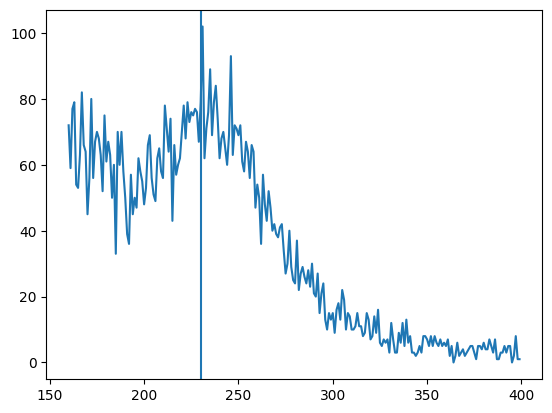

In [267]:
#pk_find(deg90, [160,400], 1)
print(pk_find(deg90, [160,400], 0))
print(pk_find(deg90, [190,400], 0))

In [307]:
err = np.array([
    9,
    15,
    15,
    10,
    10,
    11,
    19,
    24,
    27,
    21
])

num = np.array([
        pk_find(deg0, [410,700], 0),
        pk_find(deg10, [400,600], 0),
        pk_find(deg20, [370,600], 0),
        pk_find(deg30, [330,700], 0),
        pk_find(deg40, [310,600], 0),
        pk_find(deg50, [260,600], 0),
        pk_find(deg60, [220,500], 0),
        pk_find(deg70, [200,500], 0),
        pk_find(deg80, [180,400], 0),
        pk_find(deg90, [160,400], 0)
       ])

angles = np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [285]:
nnum = cal* np.array([
        pk_find(deg0, [410,700], 0)+err[0],
        pk_find(deg10, [400,600], 0)+err[1],
        pk_find(deg20, [370,600], 0)+err[2],
        pk_find(deg30, [330,700], 0)+err[3],
        pk_find(deg40, [310,600], 0)+err[4],
        pk_find(deg50, [260,600], 0)+err[5],
        pk_find(deg60, [220,500], 0)+err[6],
        pk_find(deg70, [200,500], 0)+err[7],
        pk_find(deg80, [180,400], 0)+err[8],
        pk_find(deg90, [160,400], 0)+err[9],
        pk_find(deg0, [410,700], 0)-err[0],
        pk_find(deg10, [400,600], 0)-err[1],
        pk_find(deg20, [370,600], 0)-err[2],
        pk_find(deg30, [330,700], 0)-err[3],
        pk_find(deg40, [310,600], 0)-err[4],
        pk_find(deg50, [260,600], 0)-err[5],
        pk_find(deg60, [220,500], 0)-err[6],
        pk_find(deg70, [200,500], 0)-err[7],
        pk_find(deg80, [180,400], 0)-err[8],
        pk_find(deg90, [160,400], 0)-err[9]
       ])

nangles = np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90,0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [286]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(theta,E,m):
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

p, C = curve_fit(energy, nangles, nnum, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
E = p[0]
m = p[1]
err = sigp[1]
print("E =",E)
print("m =",cal*m)
print("Error =",err)

E = 666.9445931658685
m = 717.5029043008636
Error = 1.2108295551071693


In [309]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

data = RealData(angles, num)
model = Model(energy)

odr = ODR(data,model, beta0=[0., 1.], delta0=err)

x = np.arange(0,90,0.001)

plot(angles,num,'ro')
odr.set_job(fit_type=0)
output = odr.run()
y = energy(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)
print(output.beta*cal)
print(output.sd_beta*cal)

[660.90323106 556.37175537]
[ 2.02033615 11.23778583]


In [292]:
err = np.array([
    9,
    15,
    15,
    10,
    10,
    11,
    19,
    24,
    27,
    21
])

num = np.array([
        pk_find(deg0, [410,700], 0),
        pk_find(deg10, [400,600], 0),
        pk_find(deg20, [370,600], 0),
        pk_find(deg30, [330,700], 0),
        pk_find(deg40, [310,600], 0),
        pk_find(deg50, [260,600], 0),
        pk_find(deg60, [220,500], 0),
        pk_find(deg70, [200,500], 0),
        pk_find(deg80, [180,400], 0),
        pk_find(deg90, [160,400], 0)
       ])

angles = np.array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [303]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(theta,E,m):
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

p, C = curve_fit(energy, angles, num, sigma=err, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
E = p[0]
m = p[1]
#err = sigp[1]
print("E =",E)
print("m =",m*cal)
print("Error =",sigp[1])

E = 509.2315654006996
m = 565.4095291593601
Error = 29.07949145197559


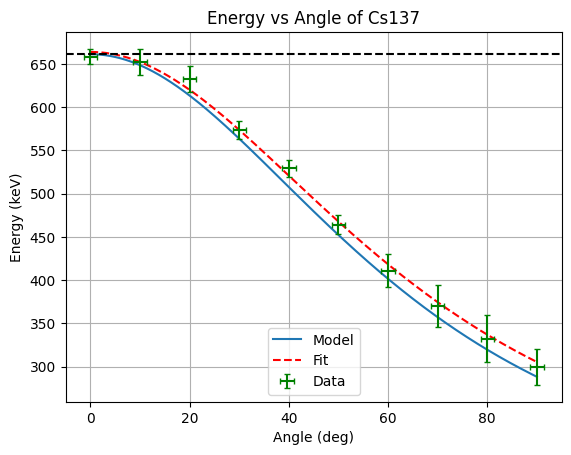

In [302]:
# If want x-error
a = 0.2 #inch
d = 8.5 #inch
angle = np.arcsin(a/np.sqrt(a**2+d**2))*180/np.pi

Na= 392
#quick cal
cal = 511/Na

x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy(x, 661.2,511), label="Model")
ax.plot(x, cal*energy(x, E, m), ls='--', color='r', label="Fit")
ax.errorbar(angles, cal*num,
            xerr=angle,
            yerr=err,
            fmt=' ',
            capsize=2,
            color='g',
            label="Data")
#ax.plot(angles, cal*num, marker='.', ls='', color='g')
#ax.axvline(0, ls='--', color='black')
#ax.axvline(90, ls='--', color='black')

ax.axhline(661.2,ls='--',color='black')

plt.xlim(-5,95)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (deg)', ylabel='Energy (keV)',
       title='Energy vs Angle of Cs137')
ax.grid()
ax.legend(loc='lower center')

#plt.savefig('10minDATA.png', dpi=1000)
plt.show()

[512.38024093 419.02290367]
[2.99369936 5.70945804]
[667.92264731 546.22858208]
[2.9933507  5.70982909]


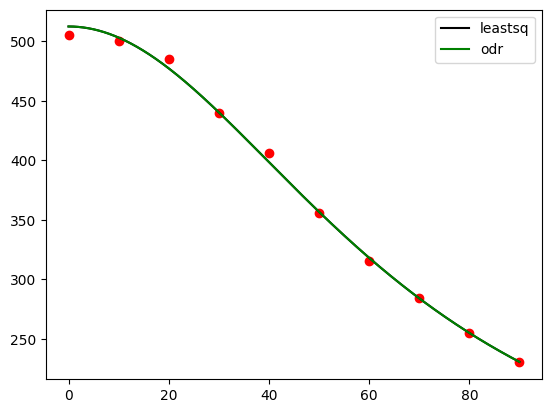

In [320]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(beta, theta):
    E,m = beta
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

data = RealData(angles, num, sx= angle, sy=0.5*num)
model = Model(energy)

odr = ODR(data,model, beta0=[0., 1.])
odr.set_job(fit_type=2)
output = odr.run()

print(output.beta)
print(output.sd_beta)

x = np.arange(0,90,0.001)
y = energy(output.beta,x)

plot(angles,num,'ro')
plot(x,y,'k-',label='leastsq')
odr.set_job(fit_type=0)
output = odr.run()
y = energy(output.beta, x)
plot(x,y,'g-',label='odr')
legend(loc=0)
print(output.beta)
print(output.sd_beta)

In [ ]:
#Theory
## Electron mass: 511, Cs peak 661.2

def energy(theta,E,m):
    theta = theta*np.pi/180
    return E/(1+(E/m)*(1-np.cos(theta)))

p, C = curve_fit(energy, angles, num, sigma=err, absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
E = p[0]
m = p[1]
#err = sigp[1]
print("E =",E*cal)
print("m =",m*cal)
print("Error =",sigp[1]*cal)
me = m*cal
merr = sigp[1]*cal

In [ ]:
x = np.arange(0,90,0.001)

fig, ax = plt.subplots()

ax.plot(x,energy(x, 661.2,511), label="Model", color='cornflowerblue')
ax.plot(x, cal*energy(x, E, m), ls='--', color='r', label="Fit")
ax.errorbar(angles, cal*num,
            yerr=err,
            fmt='.',
            capsize=2,
            color='g',
            label="Data")
#ax.plot(angles, cal*num, marker='.', ls='', color='g')
#ax.axvline(0, ls='--', color='black')
#ax.axvline(90, ls='--', color='black')

plt.xlim(-5,95)
#plt.ylim(0,1.1)

ax.set(xlabel='Angle (deg)', ylabel='Energy (keV)',
       title='Energy vs Angle of $Cs^{137}$')
ax.grid()
ax.legend(loc='upper right')

#plt.savefig('10minDATA.png', dpi=1000)
plt.show()